# **Análisis de Multicolinealidad**

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [179]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Variables numéricas**

### **Revisar valores de columnas SF**

In [180]:
df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].head(20)

,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,856,856,854
1,1262,1262,0
2,920,920,866
3,756,961,756
4,1145,1145,1053
5,796,796,566
6,1686,1694,0
7,1107,1107,983
8,952,1022,752
9,991,1077,0


### **Añadir Engineered Features**

In [181]:
# Engineered Features
df["TotalSF"] = (
    df.get("TotalBsmtSF", 0).fillna(0)
    + df.get("1stFlrSF", 0).fillna(0)
    + df.get("2ndFlrSF", 0).fillna(0)
)

df["TotalBath"] = (
    df.get("FullBath", 0).fillna(0)
    + 0.5 * df.get("HalfBath", 0).fillna(0)
    + df.get("BsmtFullBath", 0).fillna(0)
    + 0.5 * df.get("BsmtHalfBath", 0).fillna(0)
)

df["TotalPorchSF"] = (
    df.get("OpenPorchSF", 0).fillna(0)
    + df.get("EnclosedPorch", 0).fillna(0)
    + df.get("3SsnPorch", 0).fillna(0)
    + df.get("ScreenPorch", 0).fillna(0)
    + df.get("WoodDeckSF", 0).fillna(0)
)

yr_sold = df.get("YrSold", 0).fillna(0)
yb = df.get("YearBuilt", 0).fillna(0)
yrm = df.get("YearRemodAdd", 0).fillna(0)
gyr = df.get("GarageYrBlt", pd.Series(index=df.index, dtype=float))

df["HouseAge"] = yr_sold - yb
df["SinceRemodel"] = yr_sold - yrm

garage_year = gyr.fillna(yb)
df["SinceGarage"] = yr_sold - garage_year

### **Correlaciones con SalePrice**

In [182]:
# Calcular la correlación con SalePrice
correlacion_nums = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlacion_nums)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
TotalBath        0.631731
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
TotalPorchSF     0.390993
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass  

In [183]:
# Top correlaciones con SalePrice mayores a 0.45
top_corr_num = correlacion_nums[correlacion_nums > 0.45].index
top_corr_df = df[top_corr_num]
top_corr_df.corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
TotalBath       0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
dtype: float64

### **Intercorrelaciones variables numéricas más correlacionadas con SalePrice**

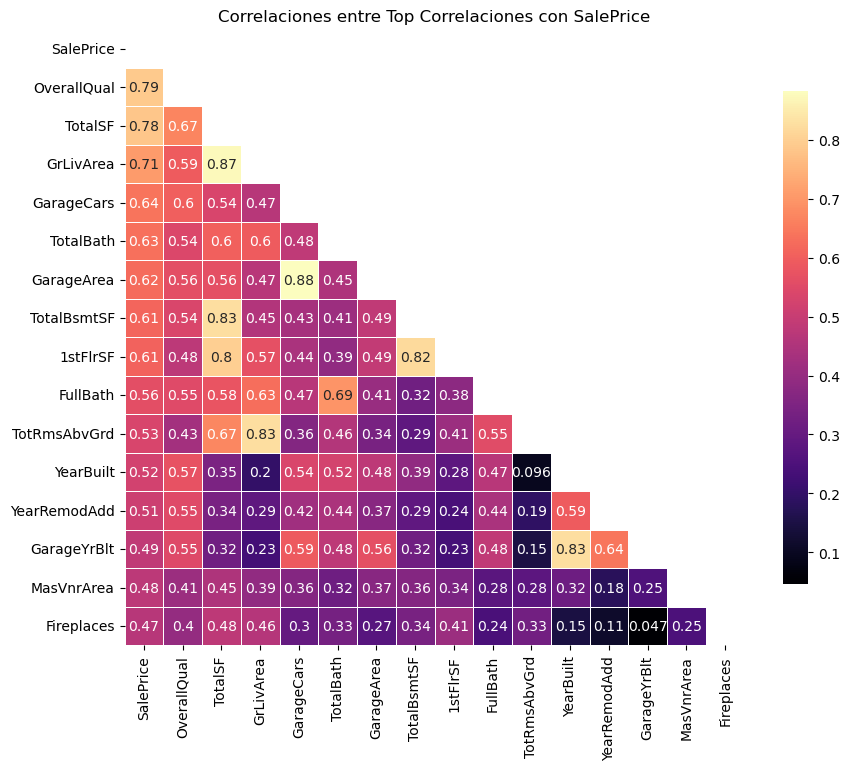

In [184]:
# Heatmap de correlación para top_corr_num sin duplicados
plt.figure(figsize=(10, 8))
corr_matrix = df[top_corr_num].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='magma', mask=mask, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlaciones entre Top Correlaciones con SalePrice')
plt.show()


### **Correlaciones más fuertes entre variables independientes**

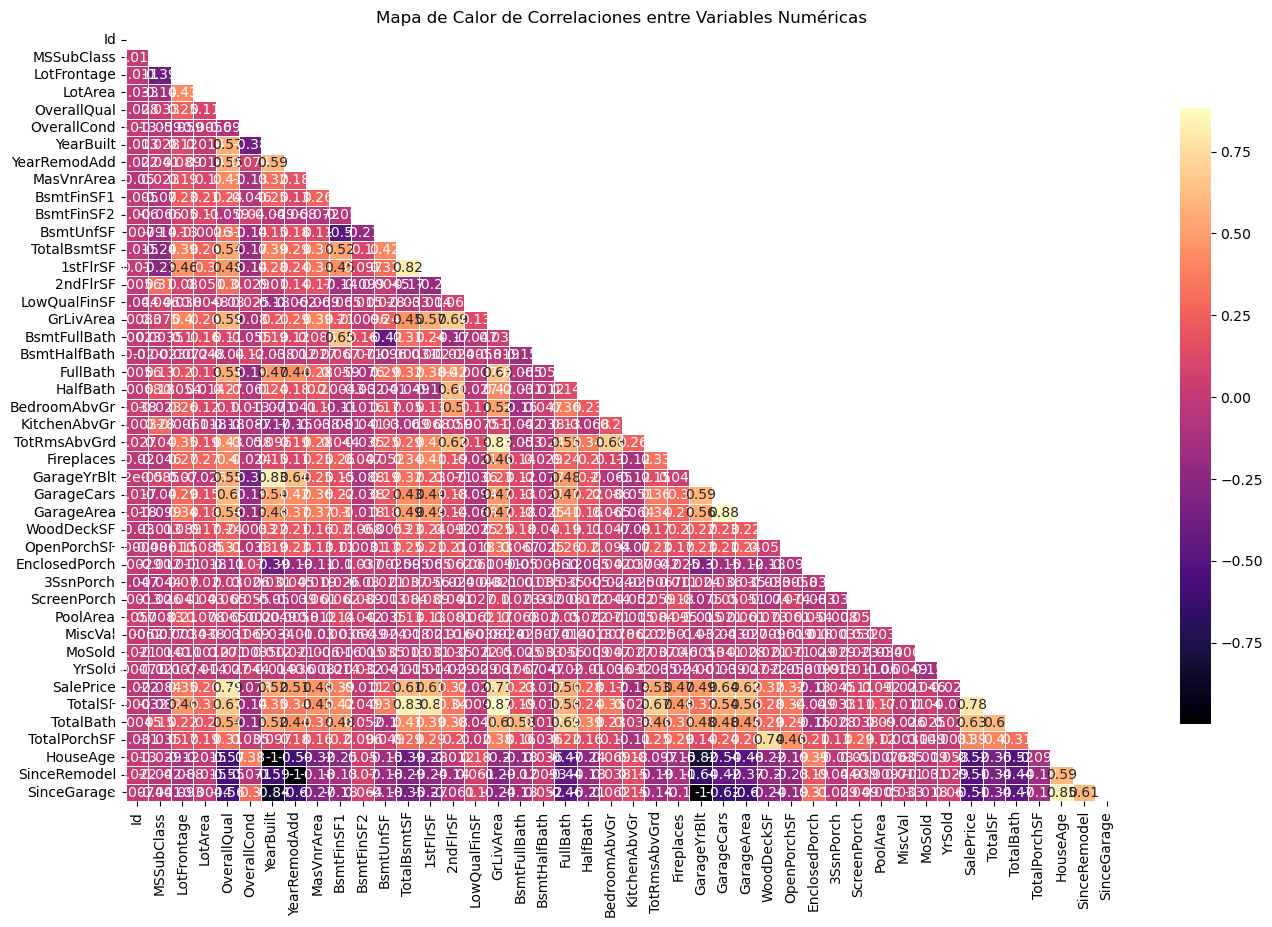

In [185]:
# Dataframe numeric variables correlation map
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, cmap='magma', cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

#### **Correlaciones fuertes (>0.45)**

In [186]:
# Mostrar todas las correlaciones entre variables mayores a 0.45
correlaciones_mayores = df.corr(numeric_only=True).abs().unstack().sort_values(ascending=False)
correlaciones_mayores = correlaciones_mayores[correlaciones_mayores > 0.45]
correlaciones_mayores = correlaciones_mayores[correlaciones_mayores < 1]
correlaciones_mayores = correlaciones_mayores.drop_duplicates()

# Mostrar el DataFrame de correlaciones alfabéticamente
correlaciones_mayores_df = correlaciones_mayores.reset_index()
correlaciones_mayores_df.columns = ['Variable 1', 'Variable 2', 'Correlación']
correlaciones_mayores_df = correlaciones_mayores_df.sort_values(by=['Variable 1', 'Variable 2'])
print("En total se encontraron: ", correlaciones_mayores.count(), " correlaciones fuertes entre variables independientes.")
correlaciones_mayores_df

En total se encontraron:  105  correlaciones fuertes entre variables independientes.


,Variable 1,Variable 2,Correlación
50,1stFlrSF,GrLivArea,0.566024
102,1stFlrSF,LotFrontage,0.457181
33,1stFlrSF,SalePrice,0.605852
32,2ndFlrSF,HalfBath,0.609707
76,BedroomAbvGr,2ndFlrSF,0.502901
...,...,...,...
49,YearBuilt,OverallQual,0.572323
67,YearBuilt,TotalBath,0.524298
43,YearBuilt,YearRemodAdd,0.592855
24,YearRemodAdd,GarageYrBlt,0.642277


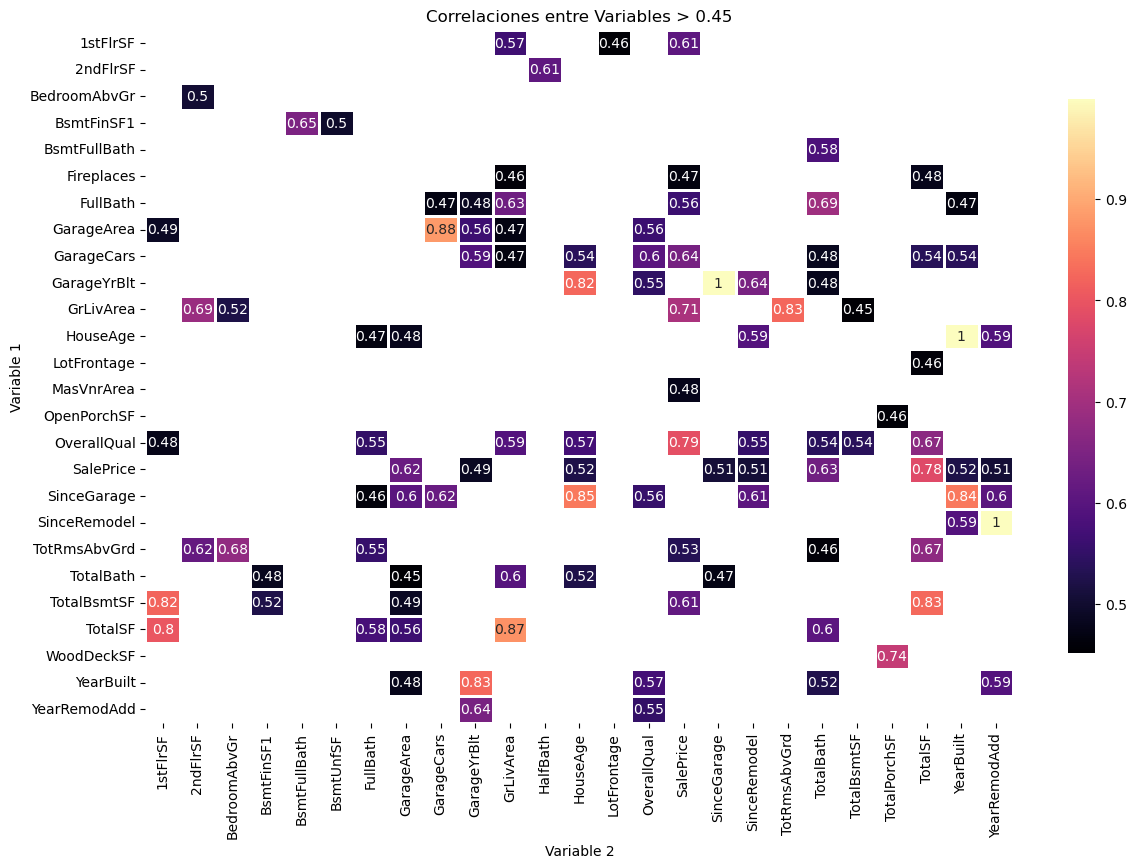

In [187]:
# Crear matriz de correlación a partir de correlaciones_mayores_df
pivot_corr = correlaciones_mayores_df.pivot(index='Variable 1', columns='Variable 2', values='Correlación')
plt.figure(figsize=(14,9))
sns.heatmap(pivot_corr,  annot=True, cmap='magma', cbar_kws={"shrink": .8}, linewidths=1)
plt.title('Correlaciones entre Variables > 0.45')
plt.show()


### **VIF para identificar colinealidades**

El VIF es una medida de la multicolinealidad entre las variables independientes entre sí.

Un valor de R^2 cercano a 1 en esta regresión auxiliar significa que la variable Xi puede ser explicada casi por completo por las otras variables, lo que resulta en un VIF muy alto y, por lo tanto, una alta multicolinealidad.

In [188]:
# Prueba VIF para las variables de df sin SalePrice 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecciona solo las variables numéricas, excluyendo SalePrice
X = df.select_dtypes(include=np.number).drop(columns=['SalePrice'])

# Rellenar los valores faltantes con la media de cada columna
X = X.fillna(X.median())

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by='VIF', ascending=False, inplace=True)
vif_data

c:\Apps\Miniconda\envs\retoHousing1\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
9,BsmtFinSF1,inf
10,BsmtFinSF2,inf
6,YearBuilt,inf
7,YearRemodAdd,inf
17,BsmtFullBath,inf
16,GrLivArea,inf
15,LowQualFinSF,inf
14,2ndFlrSF,inf
13,1stFlrSF,inf
12,TotalBsmtSF,inf


#### **Colinealidades altas (VIF>=5)**

In [189]:
# Mostrar el DataFrame de VIF solo con los valores mayores o iguales a 5
high_vif = vif_data[vif_data['VIF'] >= 5]
print(high_vif.count())
high_vif

Variable    36
VIF         36
dtype: int64


,Variable,VIF
9,BsmtFinSF1,inf
10,BsmtFinSF2,inf
6,YearBuilt,inf
7,YearRemodAdd,inf
17,BsmtFullBath,inf
16,GrLivArea,inf
15,LowQualFinSF,inf
14,2ndFlrSF,inf
13,1stFlrSF,inf
12,TotalBsmtSF,inf


#### **VIF VS Corr['SalePrice']**

In [190]:
# Comparar los resultados de VIF con las correlaciones con SalePrice

# Calcular la correlación solo para variables numéricas
correlacion_saleprice = df.select_dtypes(include=np.number).corr()['SalePrice'].reset_index()
correlacion_saleprice.columns = ['Variable', 'Correlacion con SalePrice']

# Unir con high_vif por el nombre de la variable
comparacion = pd.merge(high_vif, correlacion_saleprice, on='Variable', how='inner')
# Organizar de mayor a menor correlación
comparacion = comparacion.sort_values(by='Correlacion con SalePrice', ascending=False)
comparacion

,Variable,VIF,Correlacion con SalePrice
27,OverallQual,6.678743e+01,0.790982
15,TotalSF,inf,0.782260
5,GrLivArea,inf,0.708624
30,GarageCars,3.758337e+01,0.640409
21,TotalBath,inf,0.631731
31,GarageArea,3.354759e+01,0.623431
9,TotalBsmtSF,inf,0.613581
8,1stFlrSF,inf,0.605852
19,FullBath,inf,0.560664
26,TotRmsAbvGrd,8.355400e+01,0.533723


## **Variables Categóricas**

### **Identificación de variables categóricas**

In [191]:
# Obtener las variables categóricas
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns
print(variables_categoricas)
print("\n\nTotal de variables categóricas:", len(variables_categoricas))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Total de variables categóricas: 43


### **Tablas de contingencia**
43C2 = 903 (no cuenta repeticiones)

In [192]:
# Obtener la tabla de contingencia para cada variable categórica
# Crear tablas de contingencia entre todas las combinaciones de variables categóricas
tablas_contingencia = {}
for i, var1 in enumerate(variables_categoricas):
    for var2 in variables_categoricas[i+1:]:
        tabla = pd.crosstab(df[var1], df[var2])
        tablas_contingencia[(var1, var2)] = tabla

# Imprimir cuantas tablas de contingencia se generaron
print(f"Se generaron {len(tablas_contingencia)} tablas de contingencia.")

# Mostrar todas las tablas de contingencia
for (var1, var2), tabla in tablas_contingencia.items():
    print(f"\n\nTABLA DE CONTINGENCIA: {var1} y {var2}:")
    print(tabla)

Se generaron 903 tablas de contingencia.


TABLA DE CONTINGENCIA: MSZoning y Street:
Street    Grvl  Pave
MSZoning            
C (all)      2     8
FV           0    65
RH           0    16
RL           3  1148
RM           1   217


TABLA DE CONTINGENCIA: MSZoning y Alley:
Alley     Grvl  Pave
MSZoning            
C (all)      0     2
FV           0    24
RH           0     2
RL          14     6
RM          36     7


TABLA DE CONTINGENCIA: MSZoning y LotShape:
LotShape  IR1  IR2  IR3  Reg
MSZoning                    
C (all)     1    0    0    9
FV         10    3    0   52
RH          2    1    0   13
RL        455   35    9  652
RM         16    2    1  199


TABLA DE CONTINGENCIA: MSZoning y LandContour:
LandContour  Bnk  HLS  Low   Lvl
MSZoning                        
C (all)        1    1    2     6
FV             0    0    0    65
RH             4    2    0    10
RL            42   42   34  1033
RM            16    5    0   197


TABLA DE CONTINGENCIA: MSZoning y Utilities:
Ut

### **Prueba Chi-Cuadrada**

In [193]:
# Aplicar la prueba chi cuadrada a cada tabla de contingencia por individual
resultados_chi2 = {}

for (var1, var2), tabla in tablas_contingencia.items():
    if tabla.empty or tabla.shape[0] == 0 or tabla.shape[1] == 0:
        # Saltar tablas vacías e imprimir
        print(f"Tabla vacía para {var1} y {var2}.")
        continue
    chi2, pvalue, dof, expected = chi2_contingency(tabla)
    resultados_chi2[(var1, var2)] = (chi2, pvalue)

# Imprimir los resultados de la prueba chi cuadrada
for (var1, var2), (chi2, pvalue) in resultados_chi2.items():
    print(f"\n\nPrueba chi cuadrada para {var1} y {var2}:")
    print(f"Chi2: {chi2}, p-valor: {pvalue}")
    if pvalue < 0.05:
        print("RECHAZAR H0: existe asociación entre las variables.")
    else:
        print("NO RECHAZAR H0: no existe asociación entre las variables.")

# Mostrar la cantidad de resultados de la prueba chi cuadrada
print("\n\nRESULTADOS: ", len(resultados_chi2))


Tabla vacía para Alley y PoolQC.


Prueba chi cuadrada para MSZoning y Street:
Chi2: 94.74158356813642, p-valor: 1.293331100878627e-19
RECHAZAR H0: existe asociación entre las variables.


Prueba chi cuadrada para MSZoning y Alley:
Chi2: 50.360628474191714, p-valor: 3.036010919496931e-10
RECHAZAR H0: existe asociación entre las variables.


Prueba chi cuadrada para MSZoning y LotShape:
Chi2: 113.24940265552048, p-valor: 1.3596271487657125e-18
RECHAZAR H0: existe asociación entre las variables.


Prueba chi cuadrada para MSZoning y LandContour:
Chi2: 57.575367562852875, p-valor: 6.221391677574749e-08
RECHAZAR H0: existe asociación entre las variables.


Prueba chi cuadrada para MSZoning y Utilities:
Chi2: 0.2686462110308467, p-valor: 0.9917472273613425
NO RECHAZAR H0: no existe asociación entre las variables.


Prueba chi cuadrada para MSZoning y LotConfig:
Chi2: 39.75180928087242, p-valor: 0.0008462386541660305
RECHAZAR H0: existe asociación entre las variables.


Prueba chi cuadrada p

**TABLA DE CONTINGENCIA: Alley y PoolQC:**

Empty DataFrame

Columns: []

Index: []

#### **Resultados Chi cuadrada**

In [194]:
# Dataframe con las variables que tienen conclusion = NO RECHAZAR H0
no_rechazar_h0 = [(var1, var2) for (var1, var2), (chi2, pvalue) in resultados_chi2.items() if pvalue >= 0.05]
df_no_rechazar_h0 = pd.DataFrame(no_rechazar_h0, columns=["Variable 1", "Variable 2"])

# Mostrar el DataFrame
print("\n\nDataFrame con variables que NO RECHAZAN H0 (SIN MULTICOLINEALIDAD):")
df_no_rechazar_h0



DataFrame con variables que NO RECHAZAN H0 (SIN MULTICOLINEALIDAD):


,Variable 1,Variable 2
0,MSZoning,Utilities
1,MSZoning,RoofMatl
2,MSZoning,MasVnrType
3,MSZoning,BsmtFinType2
4,MSZoning,Functional
...,...,...
343,Fence,MiscFeature
344,Fence,SaleType
345,Fence,SaleCondition
346,MiscFeature,SaleType


In [195]:
# Dataframe con las variables que tienen conclusión = RECHAZAR H0
rechazar_h0 = [(var1, var2) for (var1, var2), (chi2, pvalue) in resultados_chi2.items() if pvalue < 0.05]
df_rechazar_h0 = pd.DataFrame(rechazar_h0, columns=["Variable 1", "Variable 2"])

# Mostrar el DataFrame
print("\n\nDataFrame con variables que RECHAZAN H0 (CON MULTICOLINEALIDAD):")
df_rechazar_h0



DataFrame con variables que RECHAZAN H0 (CON MULTICOLINEALIDAD):


,Variable 1,Variable 2
0,MSZoning,Street
1,MSZoning,Alley
2,MSZoning,LotShape
3,MSZoning,LandContour
4,MSZoning,LotConfig
...,...,...
549,GarageQual,PavedDrive
550,GarageCond,PavedDrive
551,PavedDrive,SaleType
552,PavedDrive,SaleCondition


### **Prueba V de Cramer Corregida**

**Función V de Cramer con corrección de sesgo**

phi2corr: Aplica una corrección a la medida phi cuadrado (ϕ^2=χ^2/n) para evitar que su valor sea inflado por el tamaño de la tabla.

max(0, ...): Asegura que el valor no sea negativo.

rcorr y kcorr: Aplican correcciones al número de filas y columnas, respectivamente, para tener en cuenta el sesgo de la tabla.

In [196]:
# Función para calcular V de Cramer
def cramers_v(tabla):
    chi2, _, _, _ = chi2_contingency(tabla)
    n = tabla.sum().sum()
    r, k = tabla.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [197]:
# Prueba V de Cramer para las variables categóricas que RECHAZAN H0
resultados_v_cramer = []
for (var1, var2) in rechazar_h0:
    tabla = pd.crosstab(df[var1], df[var2])
    if tabla.shape[0] < 2 or tabla.shape[1] < 2:
        print(f"Tabla de contingencia no válida para {var1} y {var2}.")
        continue
    v_cramer_rechazo = cramers_v(tabla)
    resultados_v_cramer.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'V de Cramer': v_cramer_rechazo
    })

df_v_cramer_rechazo = pd.DataFrame(resultados_v_cramer)
df_v_cramer_rechazo

,Variable 1,Variable 2,V de Cramer
0,MSZoning,Street,0.249384
1,MSZoning,Alley,0.717417
2,MSZoning,LotShape,0.152191
3,MSZoning,LandContour,0.102102
4,MSZoning,LotConfig,0.063847
...,...,...,...
549,GarageQual,PavedDrive,0.183389
550,GarageCond,PavedDrive,0.222582
551,PavedDrive,SaleType,0.069505
552,PavedDrive,SaleCondition,0.105698


In [198]:
df_v_cramer_rechazo.describe()

,V de Cramer
count,554.000000
mean,0.178048
std,0.116877
min,0.044803
25%,0.094148
50%,0.144073
75%,0.223576
max,0.758884


In [199]:
# Prueba V de Cramer para las variables categóricas que NO RECHAZAN H0
resultados_v_cramer = []
for (var1, var2) in no_rechazar_h0:
    tabla = pd.crosstab(df[var1], df[var2])
    if tabla.shape[0] < 2 or tabla.shape[1] < 2:
        print(f"Tabla de contingencia no válida para {var1} y {var2}.")
        continue
    v_cramer_no_rechazo = cramers_v(tabla)
    resultados_v_cramer.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'V de Cramer': v_cramer_no_rechazo
    })

df_v_cramer_no_rechazo = pd.DataFrame(resultados_v_cramer)
df_v_cramer_no_rechazo

Tabla de contingencia no válida para MSZoning y PoolQC.
Tabla de contingencia no válida para Street y Alley.
Tabla de contingencia no válida para Street y PoolQC.
Tabla de contingencia no válida para Street y Fence.
Tabla de contingencia no válida para Alley y Utilities.
Tabla de contingencia no válida para Alley y Condition2.
Tabla de contingencia no válida para Alley y RoofMatl.
Tabla de contingencia no válida para Alley y MiscFeature.
Tabla de contingencia no válida para Utilities y PoolQC.
Tabla de contingencia no válida para Utilities y Fence.
Tabla de contingencia no válida para Utilities y MiscFeature.
Tabla de contingencia no válida para LandSlope y PoolQC.
Tabla de contingencia no válida para Condition2 y PoolQC.
Tabla de contingencia no válida para BldgType y PoolQC.
Tabla de contingencia no válida para RoofMatl y MiscFeature.
Tabla de contingencia no válida para BsmtCond y PoolQC.
Tabla de contingencia no válida para Heating y PoolQC.
Tabla de contingencia no válida para Cen

,Variable 1,Variable 2,V de Cramer
0,MSZoning,Utilities,0.000000
1,MSZoning,RoofMatl,0.000000
2,MSZoning,MasVnrType,0.059193
3,MSZoning,BsmtFinType2,0.038781
4,MSZoning,Functional,0.000000
...,...,...,...
321,Fence,MiscFeature,0.000000
322,Fence,SaleType,0.000000
323,Fence,SaleCondition,0.000000
324,MiscFeature,SaleType,0.000000


In [200]:
df_v_cramer_no_rechazo.describe()

,V de Cramer
count,326.000000
mean,0.036420
std,0.095889
min,0.000000
25%,0.000000
50%,0.000000
75%,0.033194
max,0.707107


#### **Resultados V de Cramer**

In [201]:
# Identificar las variables con valores V de Cramer mayores a 0.5
umbral = 0.5
variables_altas_no_rechazo = df_v_cramer_no_rechazo[df_v_cramer_no_rechazo['V de Cramer'] > umbral]
variables_altas_rechazo = df_v_cramer_rechazo[df_v_cramer_rechazo['V de Cramer'] > umbral]

# Dataframe de las variables con alta correlacion
df_variables_altas_no_rechazo = pd.concat([variables_altas_no_rechazo, variables_altas_no_rechazo], axis=0)
df_variables_altas_rechazo = pd.concat([variables_altas_rechazo, variables_altas_rechazo], axis=0)

In [202]:
# Imprimir cuantas filas hay en el DataFrame
print("De las no rechazo de chi cuadrada hay: ", df_variables_altas_no_rechazo.shape[0], " variables que tienen alta asociación")
print("De las rechazo de chi cuadrada hay:    ", df_variables_altas_rechazo.shape[0], " variables que tienen alta asociación")

De las no rechazo de chi cuadrada hay:  10  variables que tienen alta asociación
De las rechazo de chi cuadrada hay:     24  variables que tienen alta asociación


In [203]:
df_variables_altas_rechazo

,Variable 1,Variable 2,V de Cramer
1,MSZoning,Alley,0.717417
6,MSZoning,Neighborhood,0.640629
45,Alley,Neighborhood,0.756122
47,Alley,BldgType,0.541913
50,Alley,ExterQual,0.585609
51,Alley,Foundation,0.533435
52,Alley,BsmtQual,0.513906
55,Alley,GarageFinish,0.537561
156,Neighborhood,BsmtQual,0.534861
285,Exterior1st,Exterior2nd,0.758884


In [204]:
variables_altas_no_rechazo

,Variable 1,Variable 2,V de Cramer
152,Neighborhood,PoolQC,0.707107
248,Foundation,PoolQC,0.577350
272,BsmtFinType2,PoolQC,0.670820
303,GarageFinish,PoolQC,0.520416
320,PoolQC,SaleCondition,0.577350


In [205]:
#PoolQC, Alley, Utilities, MiscFeature
df[['PoolQC', 'Alley', 'Utilities', 'MiscFeature']].nunique()

PoolQC         3
Alley          2
Utilities      2
MiscFeature    4
dtype: int64

### **Correlaciones entre categoricas y SalePrice**

#### **ANOVA**

In [206]:
# ANOVA para variables categóricas no numéricas con SalePrice
from scipy.stats import f_oneway

resultados_anova = []
for var in variables_categoricas:
    grupos = [df[df[var] == categoria]['SalePrice'].dropna() for categoria in df[var].dropna().unique()]
    if len(grupos) > 1:
        stat, pvalue = f_oneway(*grupos)
        resultados_anova.append({'Variable': var, 'F-statistic': stat, 'p-value': pvalue})

df_anova = pd.DataFrame(resultados_anova)

# Calcular los grados de libertad entre grupos y dentro de grupos para cada variable
df_anova['dof_between'] = df[variables_categoricas].apply(lambda x: x.nunique() - 1).values
df_anova['dof_within'] = len(df) - df_anova['dof_between'] - 1

# Calcular la suma de cuadrados entre grupos (SS_between) y dentro de grupos (SS_within)
df_anova['MS_between'] = df_anova['F-statistic'] * df_anova['dof_within']
df_anova['SS_between'] = df_anova['MS_between'] * df_anova['dof_between']
df_anova['SS_total'] = df_anova['SS_between'] + df_anova['MS_between'] * df_anova['dof_within']

df_anova = df_anova.sort_values(by='p-value', ascending=False)
df_anova

,Variable,F-statistic,p-value,dof_between,dof_within,MS_between,SS_between,SS_total
5,Utilities,0.298804,5.847168e-01,1,1458,435.656341,4.356563e+02,6.356226e+05
38,PoolQC,1.627469,3.039853e-01,2,1457,2371.222441,4.742445e+03,3.459614e+06
7,LandSlope,1.958817,1.413964e-01,2,1457,2853.996424,5.707993e+03,4.163981e+06
1,Street,2.459290,1.170486e-01,1,1458,3585.644176,3.585644e+03,5.231455e+06
40,MiscFeature,2.157324,1.047276e-01,3,1456,3141.063774,9.423191e+03,4.582812e+06
10,Condition2,2.073899,4.342566e-02,7,1452,3011.300798,2.107911e+04,4.393488e+06
25,BsmtFinType2,2.702450,1.941009e-02,5,1454,3929.362570,1.964681e+04,5.732940e+06
39,Fence,4.948159,2.312646e-03,3,1456,7204.518990,2.161356e+04,1.051139e+07
26,Heating,4.259819,7.534721e-04,5,1454,6193.776185,3.096888e+04,9.036719e+06
31,Functional,4.057875,4.841697e-04,6,1453,5896.092997,3.537656e+04,8.602400e+06


#### **Prueba de Eta Cuadrada**

Eta cuadrada se interpreta como la proporción de la varianza en SalePrice que es explicada por la variable categórica.

In [207]:
# Calculo de eta cuadrada
df_anova['eta_squared'] = df_anova['SS_between'] / df_anova['SS_total']
# Imprimir cantidad de filas
print("Cantidad de filas en df_anova:", df_anova.shape[0])
df_anova

Cantidad de filas en df_anova: 43


,Variable,F-statistic,p-value,dof_between,dof_within,MS_between,SS_between,SS_total,eta_squared
5,Utilities,0.298804,5.847168e-01,1,1458,435.656341,4.356563e+02,6.356226e+05,0.000685
38,PoolQC,1.627469,3.039853e-01,2,1457,2371.222441,4.742445e+03,3.459614e+06,0.001371
7,LandSlope,1.958817,1.413964e-01,2,1457,2853.996424,5.707993e+03,4.163981e+06,0.001371
1,Street,2.459290,1.170486e-01,1,1458,3585.644176,3.585644e+03,5.231455e+06,0.000685
40,MiscFeature,2.157324,1.047276e-01,3,1456,3141.063774,9.423191e+03,4.582812e+06,0.002056
10,Condition2,2.073899,4.342566e-02,7,1452,3011.300798,2.107911e+04,4.393488e+06,0.004798
25,BsmtFinType2,2.702450,1.941009e-02,5,1454,3929.362570,1.964681e+04,5.732940e+06,0.003427
39,Fence,4.948159,2.312646e-03,3,1456,7204.518990,2.161356e+04,1.051139e+07,0.002056
26,Heating,4.259819,7.534721e-04,5,1454,6193.776185,3.096888e+04,9.036719e+06,0.003427
31,Functional,4.057875,4.841697e-04,6,1453,5896.092997,3.537656e+04,8.602400e+06,0.004112


#### **"Correlaciones" categóricas vs SalePrice**

η^2 = 0.01: Influencia pequeña (equivale a una correlación r de 0.10). La variable categórica explica muy poca de la variabilidad en SalePrice.

η^2 = 0.06: Influencia media (equivale a una correlación r de 0.25). La variable categórica tiene una influencia moderada en SalePrice.

η^2 = 0.14 o más: Influencia grande (equivale a una correlación r de 0.37 o más).

In [208]:
df_anova.describe()

,F-statistic,p-value,dof_between,dof_within,MS_between,SS_between,SS_total,eta_squared
count,43.000000,4.300000e+01,43.000000,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000
mean,59.685952,3.065732e-02,4.837209,1454.162791,86845.299419,3.432445e+05,1.267073e+08,0.003315
std,107.829937,1.024481e-01,4.157210,4.157210,157013.270651,5.697551e+05,2.290824e+08,0.002849
min,0.298804,1.558600e-225,1.000000,1435.000000,435.656341,4.356563e+02,6.356226e+05,0.000685
25%,6.422661,3.714137e-43,3.000000,1454.000000,9322.644786,4.833122e+04,1.360174e+07,0.002056
50%,18.611743,3.653523e-17,4.000000,1455.000000,26893.968442,1.224585e+05,3.923830e+07,0.002742
75%,56.590302,1.836918e-06,5.000000,1456.000000,82282.298487,3.557789e+05,1.200499e+08,0.003427
max,443.334831,5.847168e-01,24.000000,1458.000000,645495.514540,2.472271e+06,9.417780e+08,0.016450


In [209]:
# Variables categóricas con eta cuadrada mayor a 0.14
variables_categoricas_significativas = df_anova[df_anova['eta_squared'] > 0.14]['Variable']
variables_categoricas_significativas = variables_categoricas_significativas.sort_values(ascending=False)
variables_categoricas_significativas

Series([], Name: Variable, dtype: object)

In [210]:
# Variables categóricas con eta cuadrada mayor a 0.06
variables_categoricas_significativas = df_anova[df_anova['eta_squared'] > 0.06]['Variable']
variables_categoricas_significativas = variables_categoricas_significativas.sort_values(ascending=False)
variables_categoricas_significativas

Series([], Name: Variable, dtype: object)

In [211]:
# Variables categóricas con eta cuadrada mayor a 0.01
variables_categoricas_significativas = df_anova[df_anova['eta_squared'] > 0.01]['Variable']
variables_categoricas_significativas = variables_categoricas_significativas.sort_values(ascending=False)
variables_categoricas_significativas

8     Neighborhood
16     Exterior2nd
Name: Variable, dtype: object